In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



In [ ]:
# URL del dataset original
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Leer el dataset
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Procesar el dataset
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Crear un DataFrame con las columnas originales
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df['MEDV'] = target

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
df.to_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Boston.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.nunique()

,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
def stat_model_simple_regression(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print('\n')


y = df['MEDV']
for col in df.columns:
    if col != 'MEDV':
        stat_model_simple_regression(df[col], y)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.17e-19
Time:                        02:51:19   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

In [ ]:
sns.pairplot(data = df)

Output hidden; open in https://colab.research.google.com to view.

1. we can see that our data is capped in some limits.
2. Theres and evident linear relationship between RM, LSTAT & DIS
3. Theres some non linear relationships between CRIM, INDUS, AGE & B

<Axes: >

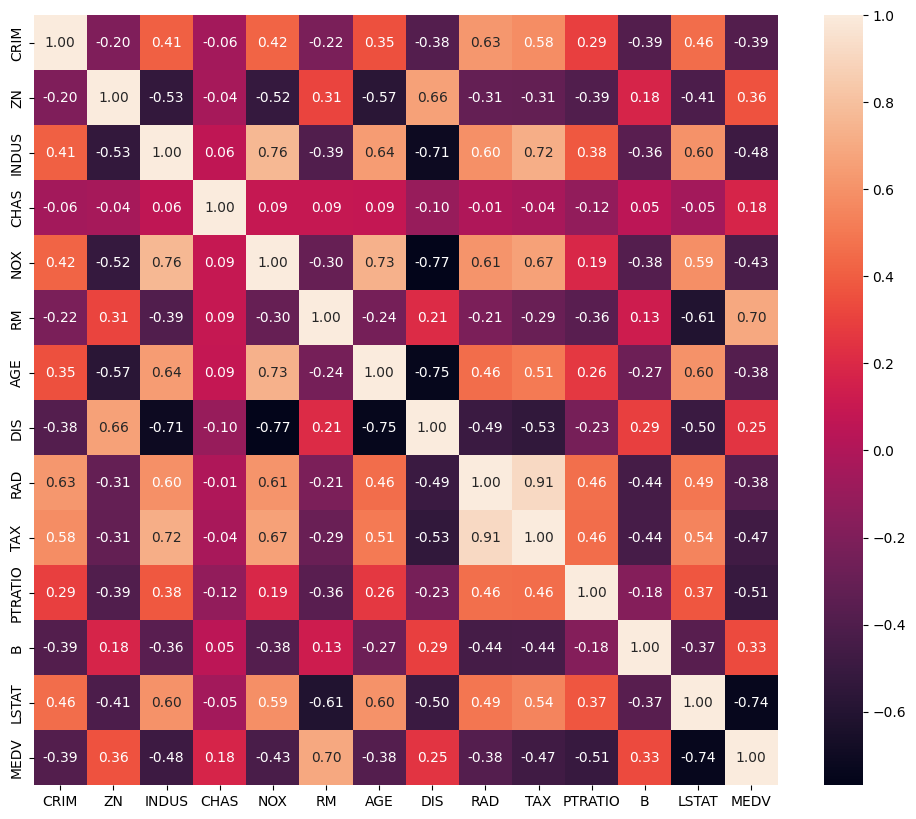

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, fmt = '2.2f')

There is a lot of colineality in the Xs

In [ ]:
y = df['MEDV']
X = df.drop('MEDV', axis = 1)

X = sm.add_constant(X)

multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Jan 2025   Prob (F-statistic):          6.72e-135
Time:                        03:01:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

b = we can reject the null hypothesis for the following vars:
INDUS & AGE

C = individually all variables were significant, but now when applying the multi reg, we can see that collineality is affecting the coefficients of age and Indus which did really good individually.




<ipython-input-22-f4594bed4fdb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]
<ipython-input-22-f4594bed4fdb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]
<ipython-input-22-f4594bed4fdb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]
<ipython-input-22-f4594bed4fdb>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future v

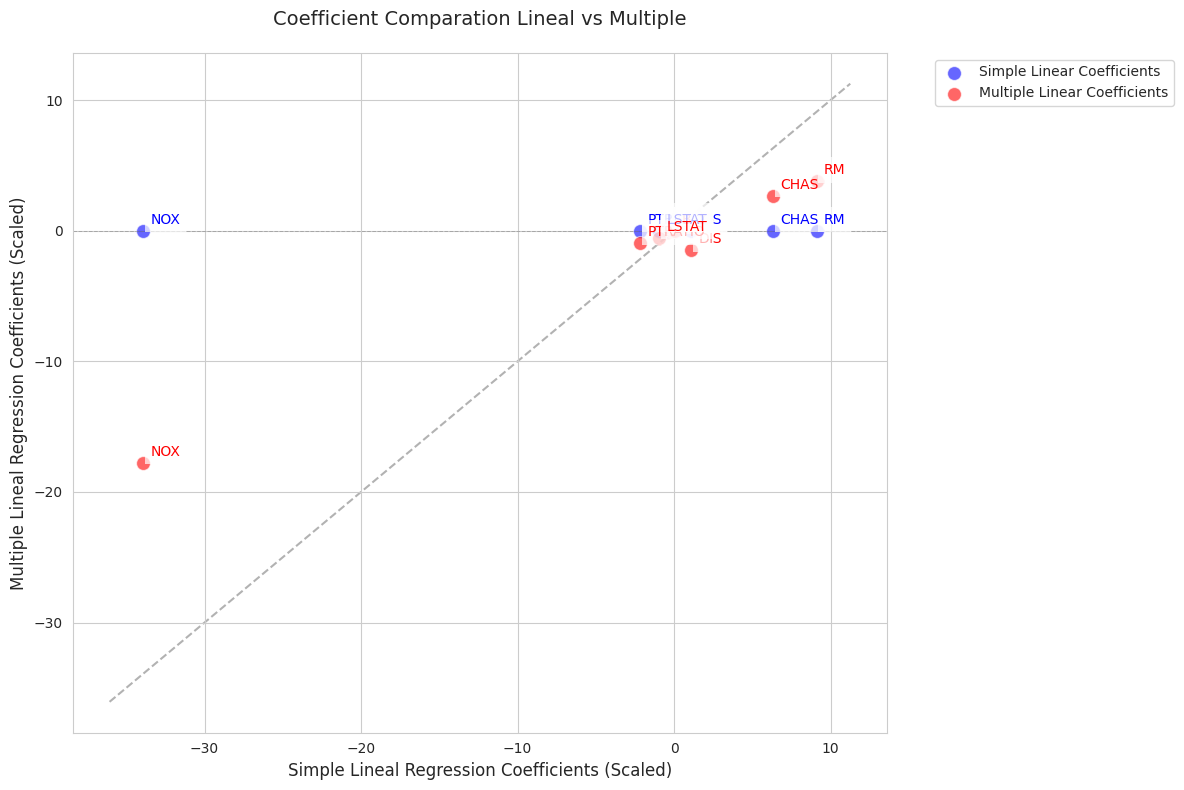

In [ ]:
def plot_regression_coefficients(df, target='MEDV'):
    y = df[target]
    univariate_coefficients = []
    predictors = []

    for col in df.columns:
        if col != target:
            X = df[col]
            coef = stat_model_simple_regression(X, y)
            univariate_coefficients.append(coef)
            predictors.append(col)

    # multi -process
    X = df.drop(target, axis=1)

    X_scaled = sm.add_constant(X)
    multi_model = sm.OLS(y, X_scaled).fit()
    multiple_coefficients = multi_model.params[1:]


    plt.figure(figsize=(12, 8))

    #Simple Lineal coeff color
    sns.scatterplot(x=univariate_coefficients,
                   y=[0]*len(univariate_coefficients),
                   s=100,
                   color='blue',
                   alpha=0.6,
                   label='Simple Linear Coefficients')

    # Multi Lineal Coef Color
    sns.scatterplot(x=univariate_coefficients,
                   y=multiple_coefficients,
                   s=100,
                   color='red',
                   alpha=0.6,
                   label='Multiple Linear Coefficients')

    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.5)


    for i, predictor in enumerate(predictors):
        #Labels for Simple Linear Reg Coeff
        plt.annotate(predictor,
                    (univariate_coefficients[i], 0),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=10,
                    color='blue',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        # labels for multiple lineal reg coef
        plt.annotate(predictor,
                    (univariate_coefficients[i], multiple_coefficients[i]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=10,
                    color='red',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    plt.xlabel('Simple Lineal Regression Coefficients (Scaled)', fontsize=12)
    plt.ylabel('Multiple Lineal Regression Coefficients (Scaled)', fontsize=12)
    plt.title('Coefficient Comparation Lineal vs Multiple', fontsize=14, pad=20)

    lims = [
        np.min([plt.xlim()[0], plt.ylim()[0]]),
        np.max([plt.xlim()[1], plt.ylim()[1]])
    ]
    plt.plot(lims, lims, 'k--', alpha=0.3, zorder=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.tight_layout()
    plt.show()


plot_regression_coefficients(df)


In [ ]:
def fit_cubic_model(X, y):
    X_squared = X**2
    X_cubic = X**3
    X_poly = sm.add_constant(np.column_stack((X, X_squared, X_cubic)))
    model = sm.OLS(y, X_poly).fit()
    print(X.name)
    print(model.summary())

for col in df.columns:
    if col != 'MEDV':
        fit_cubic_model(df[col], y)

CRIM
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.57
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.45e-26
Time:                        03:27:08   Log-Likelihood:                -1778.1
No. Observations:                 506   AIC:                             3564.
Df Residuals:                     502   BIC:                             3581.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1905      0.435     57.846    

we can see that theres significancy in most of the cubic and cuadratic terms added when expressed individually.

